In [ ]:
!pip install ta
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Bidirectional,LSTM,Dropout,TimeDistributed
from keras.layers import Dense,GlobalAveragePooling2D
from ta.trend import IchimokuIndicator
from sklearn.linear_model import LinearRegression
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download stock data from yfinance
def download_stock(stock):
    df = yf.download(
        [stock],
        start="2010-01-01",
        end="2024-01-01",
        group_by="ticker",
        progress=False
    )
    df.round(4)
    return df
apple_stocks = download_stock("AAPL")
apple_stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [ ]:
from ta.trend import IchimokuIndicator
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator

indicator_bb = BollingerBands(close=apple_stocks["Close"])
macd = MACD(close=apple_stocks["Close"])
rsi = RSIIndicator(close=apple_stocks["Close"])
ichi = IchimokuIndicator(high=apple_stocks["High"],low=apple_stocks["Low"])

apple_stocks['macd'] = macd.macd()
apple_stocks['rsi'] = rsi.rsi()
apple_stocks['bb_bbm'] = indicator_bb.bollinger_mavg()
apple_stocks['bb_bbh'] = indicator_bb.bollinger_hband()
apple_stocks['bb_bbl'] = indicator_bb.bollinger_lband()
apple_stocks['ichi_a'] = ichi.ichimoku_a()
apple_stocks['ichi_b'] = ichi.ichimoku_b()
apple_stocks['ichi_base'] = ichi.ichimoku_base_line()
apple_stocks['ichi_conv'] = ichi.ichimoku_conversion_line()
apple_stocks = apple_stocks.fillna(0)

def create_moving_average(df, moving_average_days=[50, 100, 200]):
  for moving_average in moving_average_days:
    for company in df:
      column_name = f'Moving Average for {moving_average} days'
      df[column_name] = df["Close"].rolling(moving_average).mean()
  return df.iloc[max(moving_average_days):]

apple_stocks = create_moving_average(apple_stocks)
apple_stocks

,Open,High,Low,Close,Adj Close,Volume,macd,rsi,bb_bbm,bb_bbh,bb_bbl,ichi_a,ichi_b,ichi_base,ichi_conv,Moving Average for 50 days,Moving Average for 100 days,Moving Average for 200 days
Date,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.357647,1232784000,0.382695,70.061930,10.498732,11.228973,9.768491,10.628839,9.902857,10.437857,10.819821,9.693457,9.463275,8.784248
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.389089,721624400,0.381549,70.678640,10.539411,11.305430,9.773392,10.677143,9.902857,10.479285,10.875000,9.729971,9.482436,8.801418
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.358554,551460000,0.373426,69.188061,10.576196,11.366537,9.785856,10.714196,9.902857,10.508928,10.919464,9.772350,9.499825,8.819016
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.296568,372778000,0.356966,66.139105,10.603250,11.409962,9.796538,10.751518,9.902857,10.583571,10.919464,9.812121,9.515368,8.836318
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.337993,392462000,0.343905,67.179997,10.634821,11.456309,9.813334,10.828571,9.902857,10.607143,11.050000,9.854793,9.531696,8.853614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,2.636317,54.609714,193.668501,199.343118,187.993883,194.602497,182.644997,193.534996,195.669998,185.398801,181.768301,178.649100
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,2.306308,53.026883,193.831501,199.231774,188.431228,194.879997,182.644997,193.534996,196.224998,185.682801,181.787101,178.871851
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,2.029448,53.291938,193.969001,199.148303,188.789699,194.444996,182.644997,193.534996,195.354996,185.971400,181.898701,179.085250


In [ ]:
from sklearn.model_selection import train_test_split

window_size = 100

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(apple_stocks)

X_train = []
y_train = []
for i in range(window_size, 1258):
    X_train.append(training_set_scaled[i-window_size:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, shuffle=True)

X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse', 'mae'])
history = regressor.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 16s 265ms/step - loss: 6.1395e-04 - mse: 6.1395e-04 - mae: 0.0179 - val_loss: 1.5133e-04 - val_mse: 1.5133e-04 - val_mae: 0.0105
Epoch 2/100
33/33 [==============================] - 8s 229ms/step - loss: 1.0046e-04 - mse: 1.0046e-04 - mae: 0.0078 - val_loss: 4.3718e-05 - val_mse: 4.3718e-05 - val_mae: 0.0051
Epoch 3/100
33/33 [==============================] - 6s 179ms/step - loss: 7.5860e-05 - mse: 7.5860e-05 - mae: 0.0067 - val_loss: 4.8163e-05 - val_mse: 4.8163e-05 - val_mae: 0.0055
Epoch 4/100
33/33 [==============================] - 7s 202ms/step - loss: 6.9828e-05 - mse: 6.9828e-05 - mae: 0.0065 - val_loss: 4.1996e-05 - val_mse: 4.1996e-05 - val_mae: 0.0050
Epoch 5/100
33/33 [==============================] - 6s 186ms/step - loss: 6.5334e-05 - mse: 6.5334e-05 - mae: 0.0061 - val_loss: 4.9814e-05 - val_mse: 4.9814e-05 - val_mae: 0.0057
Epoch 6/100
33/33 [==============================] - 8s 245ms/step - loss: 6.6100e-05 - mse: 6

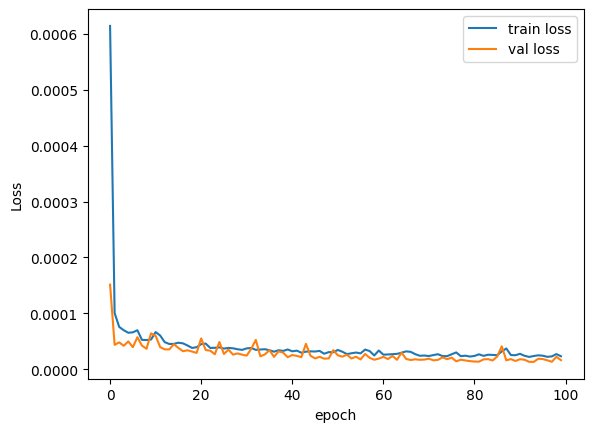

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

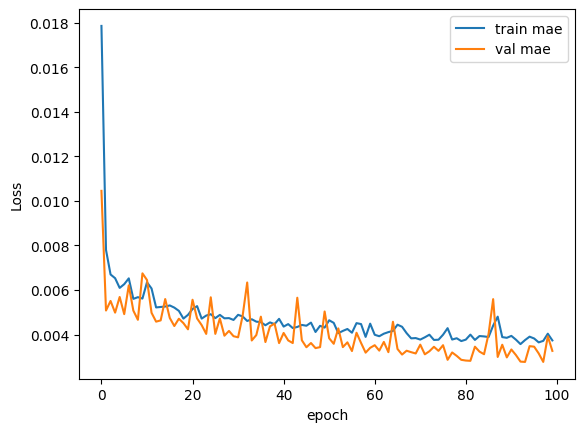

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_32 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_33 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_33 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_34 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_34 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_35 (LSTM)              (None, 50)               

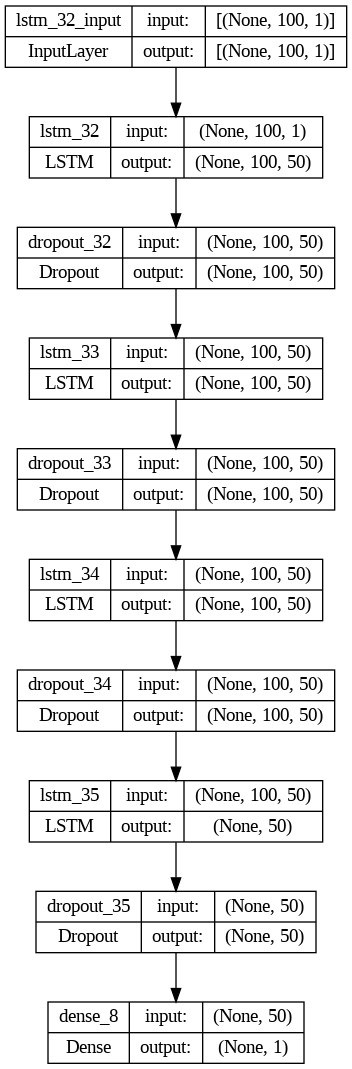

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(regressor.summary())
plot_model(regressor, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
regressor.evaluate(X_test, y_test)

4/4 [==============================] - 0s 53ms/step - loss: 1.6281e-05 - mse: 1.6281e-05 - mae: 0.0033


[1.6280970157822594e-05, 1.6280970157822594e-05, 0.003271104535087943]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = regressor.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(y_test.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(y_test.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.984407
R2 Score: 0.984407
Max Error: 0.010637


4/4 [==============================] - 0s 73ms/step


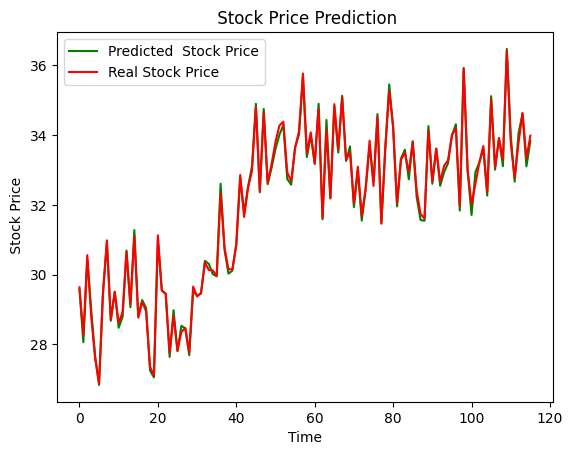

In [ ]:
predicted  = regressor.predict(X_test)
test_label = y_test.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(X_train)
for j in range(len_t , len_t + len(X_test)):
    temp = apple_stocks.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()